In [23]:
import numpy as np
import pandas as pd
from fancyimpute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [24]:
'''
pre-processes melanoma data

'''

'\npre-processes melanoma data\n\n'

In [25]:
# read in data

raw_data = pd.read_csv('../Melanoma/total_PD_1.csv')
raw_data.head()

/Users/sophiesun/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,GSM2445716,GSM2445717,GSM2445718,GSM2445719,GSM2445720,GSM2445721,GSM2445722,GSM2445723,GSM2445724,...,SRR5088909,SRR5088911,SRR5088913,SRR5088914,SRR5088916,SRR5088920,SRR5088922,SRR5088924,SRR5088926,SRR5088929
0,5S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.039753,0.1036,0,0,0.0428182,0.138019,0.0139869,0.0539995,0.0914821,0.0727011
1,5_8S_rRNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,7SK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,A1BG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0298032,0.244701,0.172904,0.10584,0.188846,0.102993,0.0440417,0.151334,0.169748,0.0304227
4,A1BG-AS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.410368,1.10834,1.55227,1.59396,1.20657,0.951995,0.117314,0.550993,1.18046,0.645802


In [26]:
# some re-formatting

# rename column
raw_data = raw_data.rename(columns={raw_data.columns[0]: 'patient'})
print(raw_data.shape)

# transpose so columns are genes and rows are patients
t_data = raw_data.set_index('patient').T
print(t_data.shape)

# drop rows(patient) with resopnse = UNK
t_data = t_data[t_data["Response"] != "UNK"]
print(t_data.shape)

# split data
labels = t_data['Response']
clean_data= t_data.drop(columns = ['Response'])

# check index
print(clean_data.index)

(56270, 158)
(157, 56270)
(150, 56270)
Index(['GSM2445716', 'GSM2445717', 'GSM2445718', 'GSM2445719', 'GSM2445720',
       'GSM2445721', 'GSM2445722', 'GSM2445723', 'GSM2445724', 'GSM2445725',
       ...
       'SRR5088909', 'SRR5088911', 'SRR5088913', 'SRR5088914', 'SRR5088916',
       'SRR5088920', 'SRR5088922', 'SRR5088924', 'SRR5088926', 'SRR5088929'],
      dtype='object', length=150)


In [27]:
# filtering

# select GSE910 samples
gse910_indices = clean_data.index[clean_data.index.str.contains('SRR')]

clean_data = clean_data.loc[gse910_indices]
labels = labels.loc[gse910_indices]

# drop any genes with > 90% missing data
clean_data = clean_data.dropna(thresh = clean_data.shape[0]*0.9, axis=1)

# drop genes with >80% 0 input
zero_percent = (clean_data == 0). mean(axis = 0)
clean_data = clean_data.loc[:,zero_percent<0.8]
print(clean_data.shape)

# check
print(clean_data.head)
print(labels.head)

# export true labels (no SMOTE; response R/N)
labels.to_csv('../data/GSE910_noSMOTE_labels_top100.csv')

(84, 35548)
<bound method NDFrame.head of patient       5S_rRNA       A1BG  A1BG-AS1       A1CF      A2M   A2M-AS1  \
SRR7344546          0   0.131302   0.56498  0.0365161  166.557   1.19981   
SRR7344554  0.0933894  0.0503314  0.721904  0.0104982  221.367   5.24306   
SRR7344556   0.118987          0         0  0.0088215  23.6464   1.62315   
SRR7344564   0.203915   0.253573   3.65974  0.0760301  140.577  0.666165   
SRR7344565  0.0985991   0.181927   2.50902  0.0700551  101.541   0.34527   
...               ...        ...       ...        ...      ...       ...   
SRR5088920   0.138019   0.102993  0.951995          0  24.1677  0.470565   
SRR5088922  0.0139869  0.0440417  0.117314  0.0157479  52.6553   2.49515   
SRR5088924  0.0539995   0.151334  0.550993          0  219.473   1.36158   
SRR5088926  0.0914821   0.169748   1.18046          0  187.784  0.686251   
SRR5088929  0.0727011  0.0304227  0.645802          0  566.829  0.778388   

patient         A2ML1      A2MP1    A3GALT2  

In [28]:
# format to numeric

clean_data_numeric = clean_data.apply(pd.to_numeric, errors='coerce')
print(clean_data_numeric)

patient      5S_rRNA      A1BG  A1BG-AS1      A1CF         A2M   A2M-AS1  \
SRR7344546  0.000000  0.131302  0.564980  0.036516  166.557144  1.199808   
SRR7344554  0.093389  0.050331  0.721904  0.010498  221.367276  5.243057   
SRR7344556  0.118987  0.000000  0.000000  0.008822   23.646357  1.623148   
SRR7344564  0.203915  0.253573  3.659736  0.076030  140.576617  0.666165   
SRR7344565  0.098599  0.181927  2.509024  0.070055  101.541458  0.345270   
...              ...       ...       ...       ...         ...       ...   
SRR5088920  0.138019  0.102993  0.951995  0.000000   24.167654  0.470565   
SRR5088922  0.013987  0.044042  0.117314  0.015748   52.655333  2.495148   
SRR5088924  0.054000  0.151334  0.550993  0.000000  219.473479  1.361577   
SRR5088926  0.091482  0.169748  1.180457  0.000000  187.784364  0.686251   
SRR5088929  0.072701  0.030423  0.645802  0.000000  566.829472  0.778388   

patient        A2ML1     A2MP1   A3GALT2    A4GALT  ...   snoU2-30  snoU2_19  \
SRR7344

In [29]:
# calculate variance 

col_var = clean_data_numeric.var()

# most variable gene
print(col_var.idxmax())
print(col_var.max())

RN7SL2
172718741.04970133


In [30]:
# list top 100 genes with greatest variance

top_100_var = col_var.nlargest(100)
print(top_100_var)

top_100_var.to_csv("../data/GSE910_top_100_var.csv")

patient
RN7SL2      1.727187e+08
FTL         1.056368e+08
MT-CO3      9.842050e+07
MT-CO2      9.217200e+07
MT-ATP8     9.044177e+07
                ...     
HP          1.688574e+05
HLA-A       1.607786e+05
IGHV3-7     1.580581e+05
HLA-DRB1    1.503507e+05
KRTDAP      1.497227e+05
Length: 100, dtype: float64


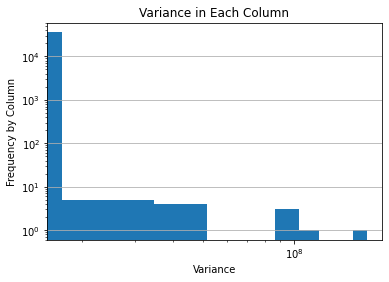

In [31]:
# plot variance

plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency by Column')
plt.title('Variance in Each Column')
plt.grid(axis='y')
plt.show()

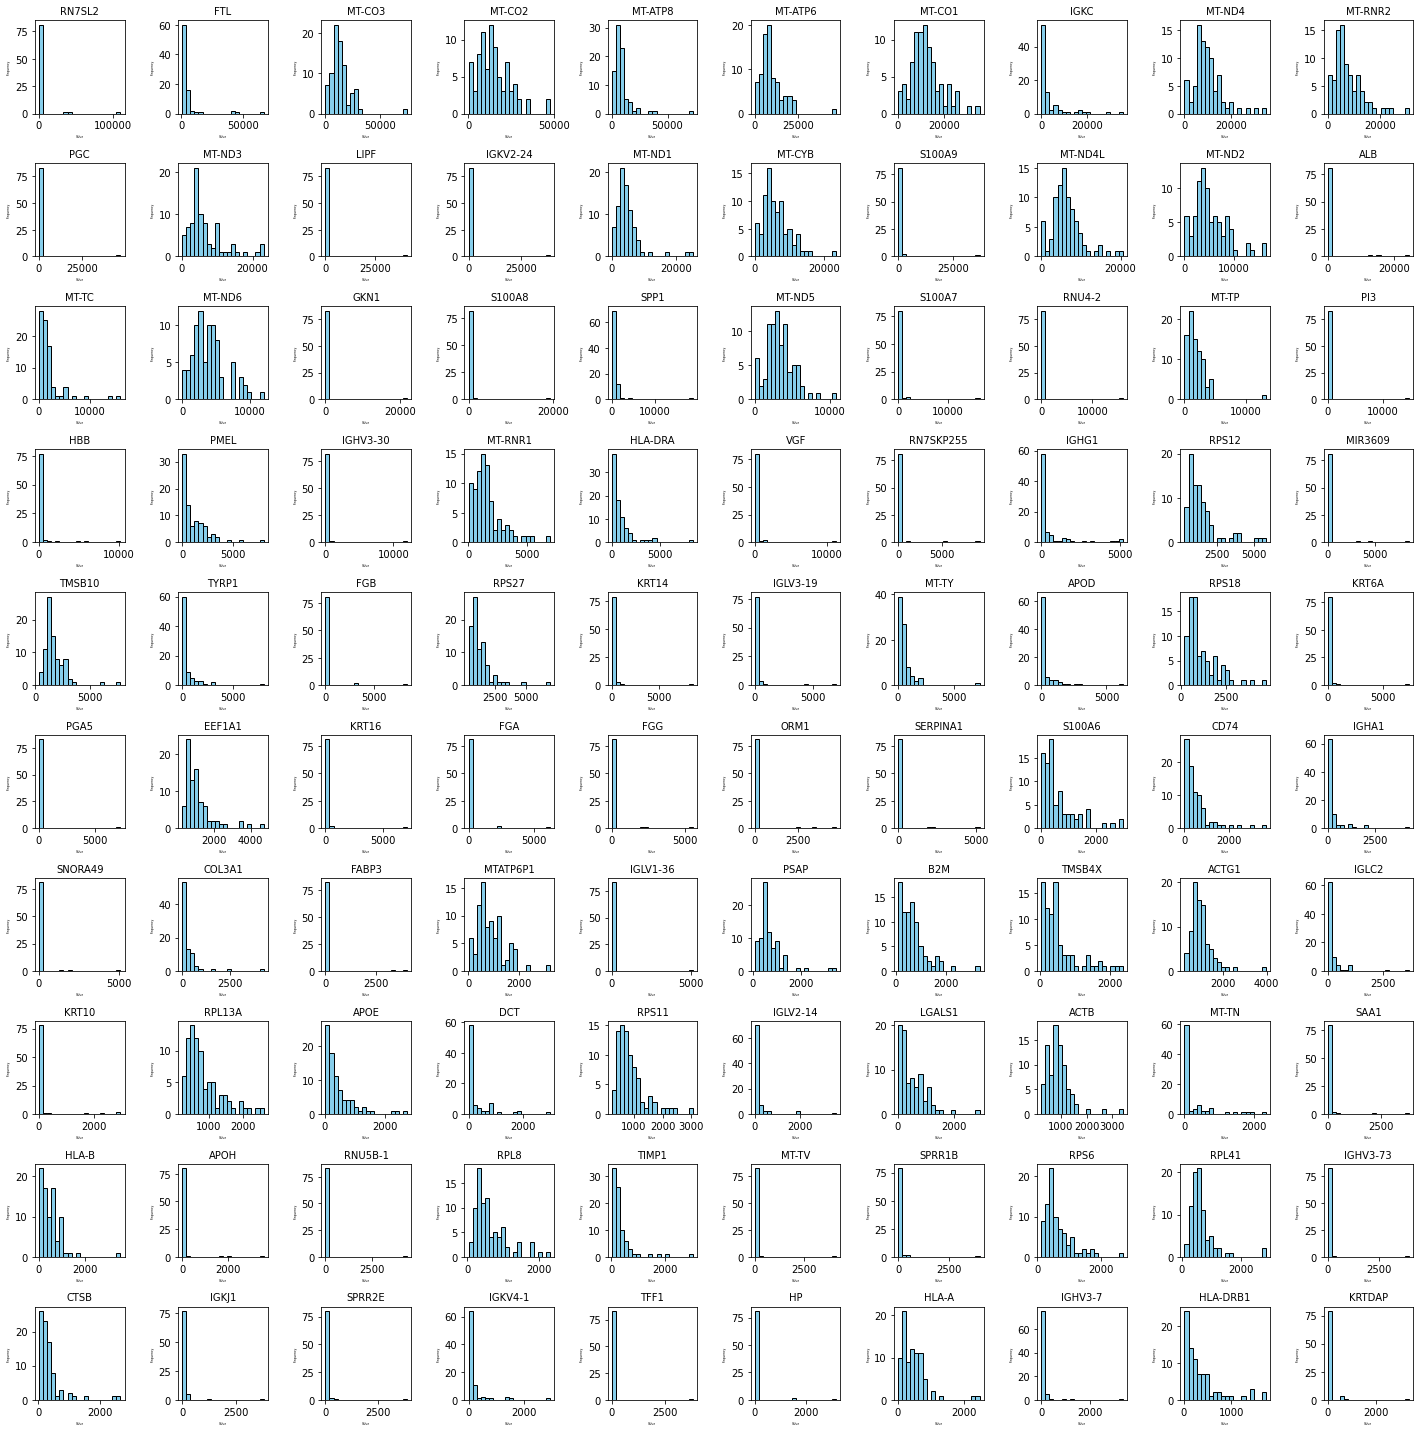

In [32]:
# plot distributions of each gene

fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_var.index):

    gene_data = clean_data_numeric[gene]

    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')

    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)


plt.tight_layout()

plt.show()

In [44]:
# select top 100 most variable genes

top_100_var_data = clean_data_numeric[top_100_var.index]
print(top_100_var_data)

# export clean data
top_100_var_data.to_csv('../data/GSE910_noSMOTE_clean_top100.csv')

patient            RN7SL2           FTL        MT-CO3        MT-CO2  \
SRR7344546   33644.454092   1231.617313     67.426776     64.339660   
SRR7344554   40729.807664    787.335580    928.541945    853.233095   
SRR7344556  109408.937655    857.066598   1071.769147   1693.762112   
SRR7344564      70.048934   3472.052260   2214.160034   1878.942823   
SRR7344565     105.676179   3693.938050   1560.394044   1213.931068   
...                   ...           ...           ...           ...   
SRR5088920      16.198037   1814.055509  11013.345486   9488.733302   
SRR5088922       7.561333   1529.834995   9810.250395  12216.453037   
SRR5088924       5.673804   3084.589815   5596.764680   6814.939451   
SRR5088926       7.899099   3317.386985  16743.654778  20187.018760   
SRR5088929       8.693633  42142.557683  15177.616694  16782.852187   

patient         MT-ATP8      MT-ATP6        MT-CO1         IGKC        MT-ND4  \
SRR7344546    30.916026    27.419759    191.705397    49.113070   

In [34]:
# log2 transformation

# add 1 to all values for log2 transformation
clean_data = clean_data.applymap(lambda x: x+1 if isinstance(x, (int, float)) else x)

# log2 transform
to_transform = clean_data
log2_data = to_transform.applymap(lambda x: np.log2(x) if isinstance(x, (int, float)) else x)
log2_data.head()

patient,5S_rRNA,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,...,snoU2-30,snoU2_19,snoU83B,snoZ196,snoZ278,snoZ40,snoZ6,snosnR66,uc_338,yR211F11.2
SRR7344546,0.000000,0.177984,0.646144,0.051743,7.388509,1.137378,0.051041,0.129775,0.000000,0.647058,...,3.13092825610652,3.28747466891185,0.0,0.0,0.0,0.0,0.0,0.0,0.416319623212903,0.0
SRR7344554,0.128807,0.070845,0.784005,0.015067,7.796801,2.642253,0.221139,0.119809,0.135597,0.141127,...,13.6818810287859,1.57521656581416,0.0,0.0,0.0,0.0,0.0,0.0,0.364929374639851,0.0
SRR7344556,0.162194,0.000000,0.000000,0.012671,4.623303,1.391299,0.016639,0.306234,0.114778,0.157222,...,4.23564377253204,0.264727735783252,0.0,0.0,0.0,0.0,0.0,0.0,0.487394747280299,0.0
SRR7344564,0.267733,0.326047,2.220248,0.105718,7.145439,0.736532,0.055363,0.562818,0.044087,2.570499,...,0.226744499164846,0.0,0.360729885034982,2.85341392207446,0.0,0.0,0.0,0.0,0.0747493692947006,0.0
SRR7344565,0.135665,0.241141,1.811070,0.097685,6.680064,0.427896,0.927511,0.202232,0.076971,1.561955,...,0.0,0.437981509864241,0.0,1.57476497928716,0.0,0.0,0.0,0.0,0.0583043344721167,0.0


MT-TN
18.241789654878286


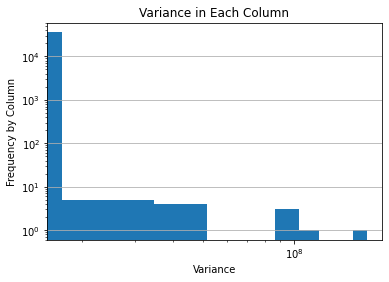

In [35]:
# check variance of log2 transformed genes

log2_var = log2_data.var()
print(log2_var.idxmax())
print(log2_var.max())


# plot 

plt.hist(col_var)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Variance')
plt.ylabel('Frequency by Column')
plt.title('Variance in Each Column')
plt.grid(axis='y')
plt.show()

In [36]:
# top 100 most variable genes after log2 transformation

top_100_log2_var = log2_var.nlargest(100)
print(top_100_log2_var)


patient
MT-TN       18.241790
IGKC        12.429385
PMEL        12.177856
DCT         12.010360
IGHG1       10.329425
              ...    
PRAME        5.564955
IGHV3-11     5.527141
IGHV1-3      5.508478
BCYRN1       5.501090
MIR3609      5.488774
Length: 100, dtype: float64


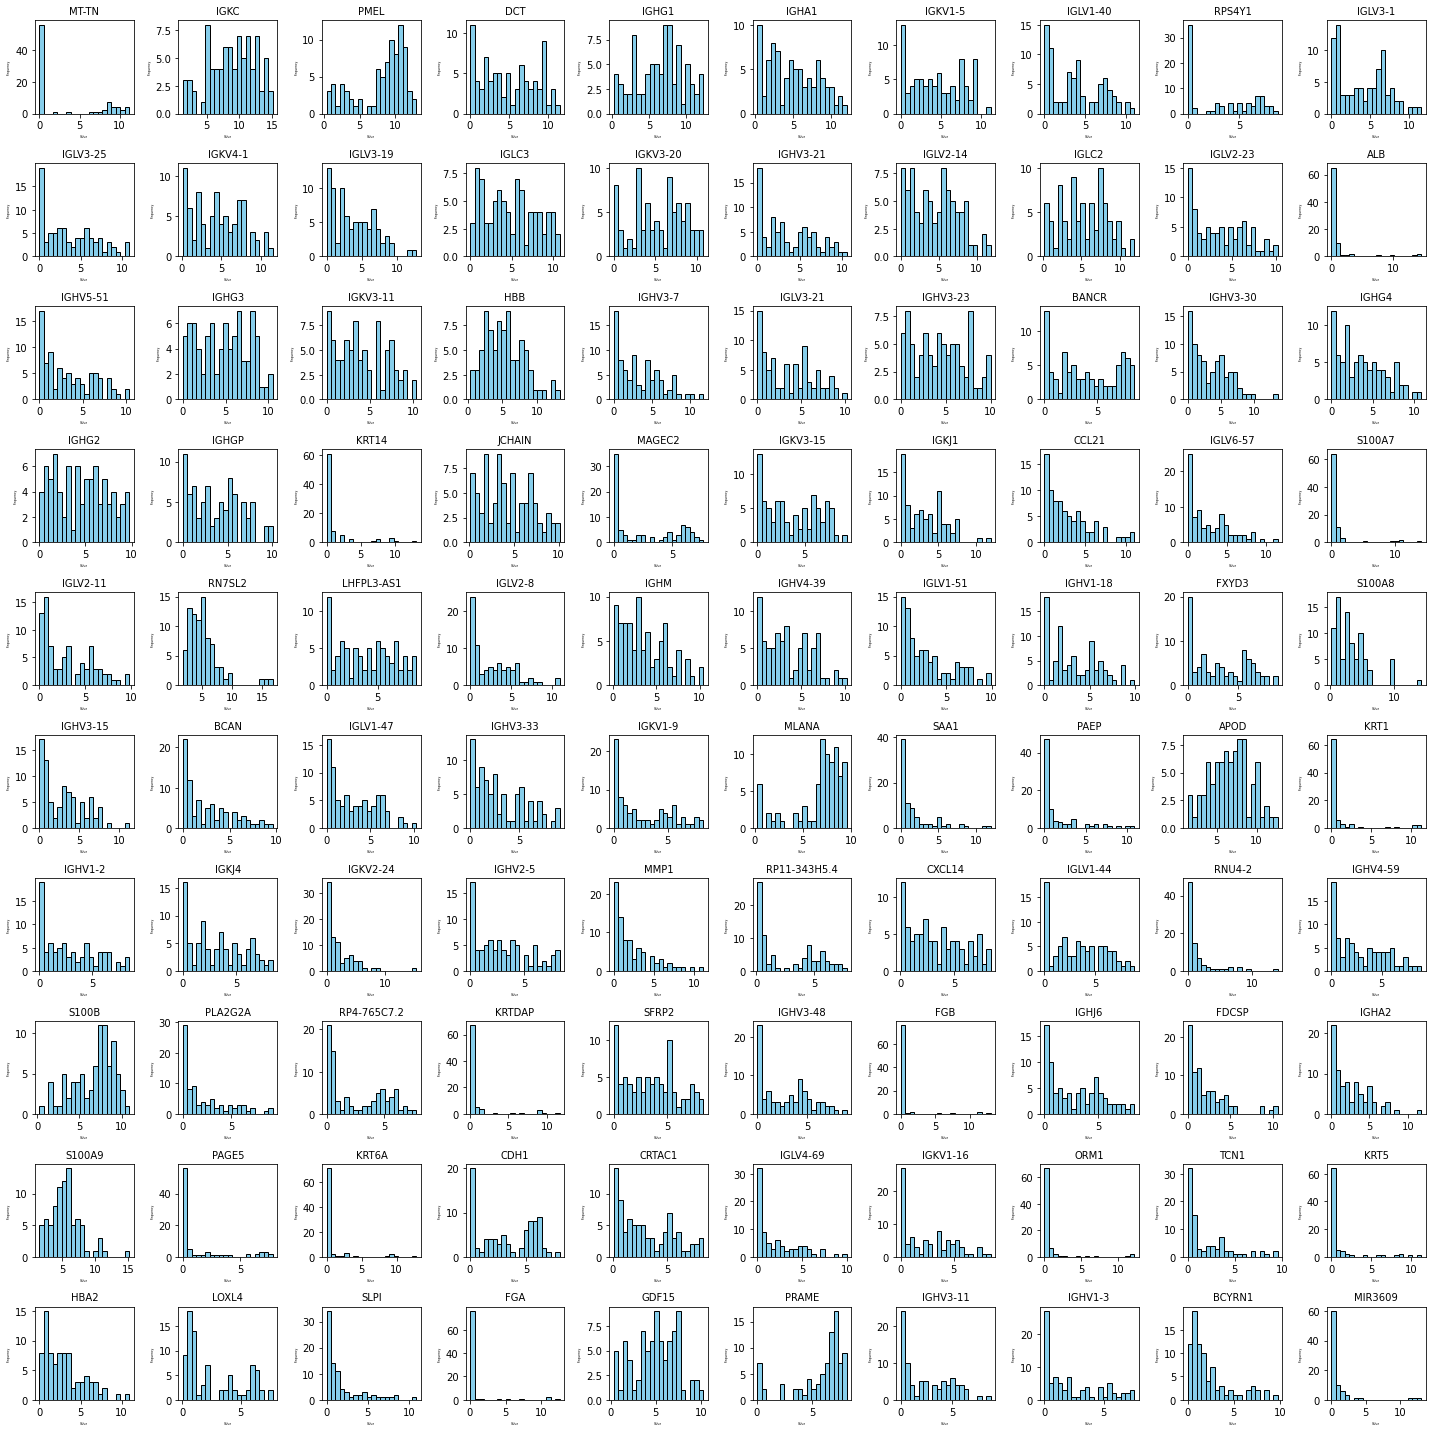

In [37]:
# plot distribution of genes after log2 transformation

fig, axs = plt.subplots(10, 10, figsize=(20, 20))

axs = axs.flatten()


for i, gene in enumerate(top_100_log2_var.index):

    gene_data = log2_data[gene]

    axs[i].hist(gene_data, bins=20, color='skyblue', edgecolor='black')

    axs[i].set_title(f'{gene}', fontsize=10)
    axs[i].set_xlabel('Value', fontsize=3)
    axs[i].set_ylabel('Frequency', fontsize=3)


plt.tight_layout()

plt.show()

In [38]:
# encode categorical labels to numerical codes
labels = labels.values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print("Label Map:")
for encoded_value, original_label in enumerate(label_encoder.classes_):
    print(f"{encoded_value}: {original_label}")

# count labels
label_counts = {}

for label in labels:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

Label Map:
0: N
1: R
Label 'R': 26
Label 'N': 58


In [39]:
# fix class imbalance

# use SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(log2_data, labels_encoded)

# count labels after resampling
resampled_counts = {}

for label in y_resampled:
    label_counts[label] = label_counts.get(label, 0) + 1

for label, count in label_counts.items():
    print(f"Label '{label}': {count}")

print(X_resampled)
print(y_resampled)

Label 'R': 26
Label 'N': 58
Label '1': 58
Label '0': 58
patient   5S_rRNA      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1     A2ML1  \
0        0.000000  0.177984  0.646144  0.051743  7.388509  1.137378  0.051041   
1        0.128807  0.070845  0.784005  0.015067  7.796801  2.642253  0.221139   
2        0.162194  0.000000  0.000000  0.012671  4.623303  1.391299  0.016639   
3        0.267733  0.326047  2.220248  0.105718  7.145439  0.736532  0.055363   
4        0.135665  0.241141  1.811070  0.097685  6.680064  0.427896  0.927511   
..            ...       ...       ...       ...       ...       ...       ...   
111      0.051181  0.079182  0.842032  0.000000  8.243470  0.852896  0.077917   
112      0.079283  0.040331  0.379863  0.134001  6.486408  0.408563  3.932220   
113      0.081206  0.097682  0.995735  0.000628  8.173263  0.326396  0.059735   
114      0.057028  0.124989  0.724959  0.001498  5.046443  1.043263  0.000395   
115      0.079552  0.123107  0.771791  0.002568  5.77

In [40]:
# as series

y_resampled = pd.Series(y_resampled, name='Response')

In [45]:
# z-score transformation (for PCA)

scaler = StandardScaler()
scaled_values = scaler.fit_transform(X_resampled)
scaled_data = pd.DataFrame(X_resampled)[top_100_var.index]
print(scaled_data.head)

<bound method NDFrame.head of patient     RN7SL2        FTL     MT-CO3     MT-CO2    MT-ATP8    MT-ATP6  \
0        15.038124  10.267509   6.096489   6.029887   4.996209   4.828822   
1        15.313833   9.622666   9.860376   9.738486   9.475843   9.217649   
2        16.739384   9.744946  10.067124  10.726867   8.760113   8.636872   
3         6.150741  11.761988  11.113195  10.876473   9.272044  10.677880   
4         6.737094  11.851334  10.608619  10.246659   8.657706   9.951498   
..             ...        ...        ...        ...        ...        ...   
111       4.355103  11.250609  13.168966  12.982082  12.444777  12.334313   
112       6.131375   9.797686  13.330152  13.433663  13.033499  13.012454   
113       4.201878  10.747962  13.237784  12.853114  12.543654  12.216011   
114       7.196152  11.728989  13.865689  14.082163  13.449037  13.490130   
115       5.810201  11.861459  13.483685  14.015472  12.733038  12.980847   

patient     MT-CO1       IGKC     MT-ND4    M

In [46]:
# export

# log2 transformed data (SMOTE)
log2_resampled = X_resampled[top_100_var.index]
log2_resampled.to_csv('../data/GSE910_SMOTE_log2_top100.csv')

# normalized version of above^ (SMOTE;for PCA)
scaled_data.to_csv('../data/GSE910_SMOTE_scaled_top100.csv')

# true labels (SMOTE; response y/n)
y_resampled.to_csv('../data/GSE910_SMOTE_labels_top100.csv')